# 1. KMeans 클러스터링

## 1-1. 데이터 준비

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/ML_Team_Project/data/train.csv/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


- 원핫인코딩

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Geography'])], axis=1)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1


In [ ]:
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1


In [ ]:
df = df.drop(['Geography', 'Gender'], axis=1)
df.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,2,15694510,Hsueh,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,3,15741417,Kao,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,4,15766172,Chiemenam,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1


### df
- id, customerid, surname 제거 X

In [ ]:
df.tail()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
165029,165029,15667085,Meng,667,33.0,2,0.0,1,1.0,1.0,131834.75,0,0,0,1,1,0
165030,165030,15665521,Okechukwu,792,35.0,3,0.0,1,0.0,0.0,131834.45,0,1,0,0,0,1
165031,165031,15664752,Hsia,565,31.0,5,0.0,1,1.0,1.0,127429.56,0,1,0,0,0,1
165032,165032,15689614,Hsiung,554,30.0,7,161533.0,1,0.0,1.0,71173.03,0,0,0,1,1,0
165033,165033,15732798,Ulyanov,850,31.0,1,0.0,1,1.0,0.0,61581.79,1,1,0,0,0,1


### df_drop_id_duplicated
- id, customerid, surname 제거
- 중복 행 제거

In [ ]:
df_drop_id = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df_drop_id_duplicated = df_drop_id.drop_duplicates()

df_drop_id_duplicated.reset_index(drop=True, inplace=True)
df_drop_id_duplicated

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164906,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1,0
164907,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0,1
164908,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0,1
164909,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1,0


## 1-2. KMeans 클러스터링

- 수치형 변수 중 범주형이 아닌 변수만 클러스터링에 사용
  - CreditScore, Age, Balance, EstimatedSalary
      


- 최적의 k값 찾기
  - 엘보우 방법 : 엘보우 방법은 K-means 알고리즘을 실행할 때, 클러스터 개수(K)를 점차 증가시키면서 클러스터링을 수행하고, 이에 따른 SSE(Sum of Squared Errors) 값을 계산하여 그래프로 나타내어 최적의 K값을 선택하는 방법
    - SSE : 각 데이터 포인트와 해당 클러스터 중심점 사이의 거리를 제곱한 값의 합을 의미, SSE 값이 작을수록 클러스터링의 성능이 좋다고 판단 --> 그래서, 엘보우 방법에서는 클러스터 개수(K)를 증가시키면서 SSE 값을 계산하고, 이를 그래프로 나타낸 뒤 이때, SSE 값이 감소하는 정도가 급격하게 줄어드는 지점을 최적의 K값으로 선택

  - 실루엣 분석 : 실루엣 분석은 각 데이터 포인트가 속한 클러스터의 일관성을 측정하여 최적의 K값을 찾는 방법
    - 각 데이터 포인트의 실루엣 계수를 계산하여, 전체 데이터 포인트의 평균 실루엣 계수를 구함, 실루엣 계수는 클러스터의 일관성을 나타내며, 값이 높을수록 클러스터링 결과가 좋다는 것을 의미

In [ ]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
['Age', 'Balance', 'CreditScore', 'EstimatedSalary']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

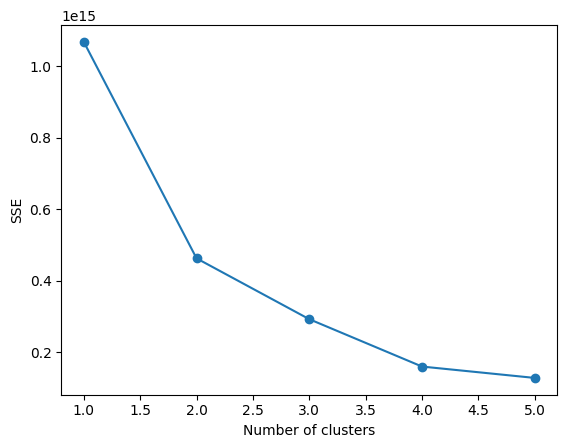

In [ ]:
# 엘보우 방법을 사용하여 최적의 K값 탐색
sse = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']])
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 6), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

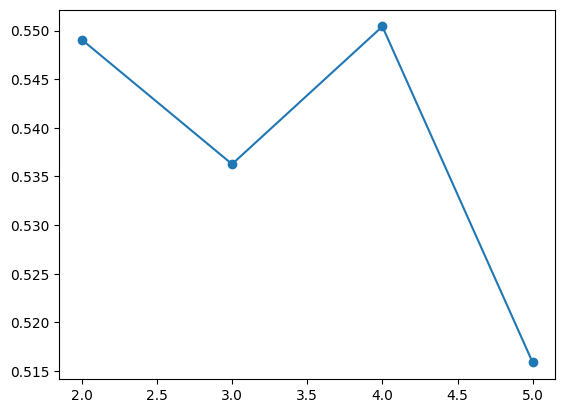

In [ ]:
# 실루엣 분석을 사용하여 최적의 K값 탐색
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']])
    score = silhouette_score(df[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']], kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 분석 그래프 그리기
plt.plot(range(2, 6), silhouette_scores, marker='o')

- --> k = 2, 4

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def kmeans_draw_plot(df, col1, col2, col3, col4, num):

  # 군집화 변수 선택 및 kmeans, 데이터프레임
  feature = df[[col1, col2, col3, col4]]
  model = KMeans(n_clusters=num, n_init='auto', random_state=13)
  model.fit(feature)

  predict = pd.DataFrame(model.labels_, columns=['cluster'])
  tmp_df = pd.concat([df, predict], axis=1)

  print(tmp_df.groupby(['cluster'])['Exited'].mean().sort_values(ascending=False))
  print('='*100)

  # 이탈률이 가장 높은 군집 확인
  idx = tmp_df.groupby(['cluster'])['Exited'].mean().sort_values(ascending=False).index[0]
  tmp_df = tmp_df[tmp_df['cluster'] == idx]


  # 이탈률이 가장 높은 군집을 대상으로 변수 별 시각화
  plt.figure(figsize=(15,12))
  sns.histplot(x = tmp_df[col1], hue = tmp_df['Exited'], palette = sns.color_palette())
  plt.title(col1)
  plt.show();

  plt.figure(figsize=(15,12))
  sns.histplot(x = tmp_df[col2], hue = tmp_df['Exited'], palette = sns.color_palette())
  plt.title(col2)
  plt.show();

  plt.figure(figsize=(15,12))
  sns.histplot(x = tmp_df[col3], hue = tmp_df['Exited'], palette = sns.color_palette())
  plt.title(col3)
  plt.show();

  plt.figure(figsize=(15,12))
  sns.histplot(x = tmp_df[col4], hue = tmp_df['Exited'], palette = sns.color_palette())
  plt.title(col4)
  plt.show();

  plt.figure(figsize=(15,12))
  sns.histplot(x = tmp_df['NumOfProducts'], hue = tmp_df['Exited'], palette = sns.color_palette())
  plt.title('NumOfProducts')
  plt.show();



- k == 2

cluster
0    0.270734
1    0.162759
Name: Exited, dtype: float64


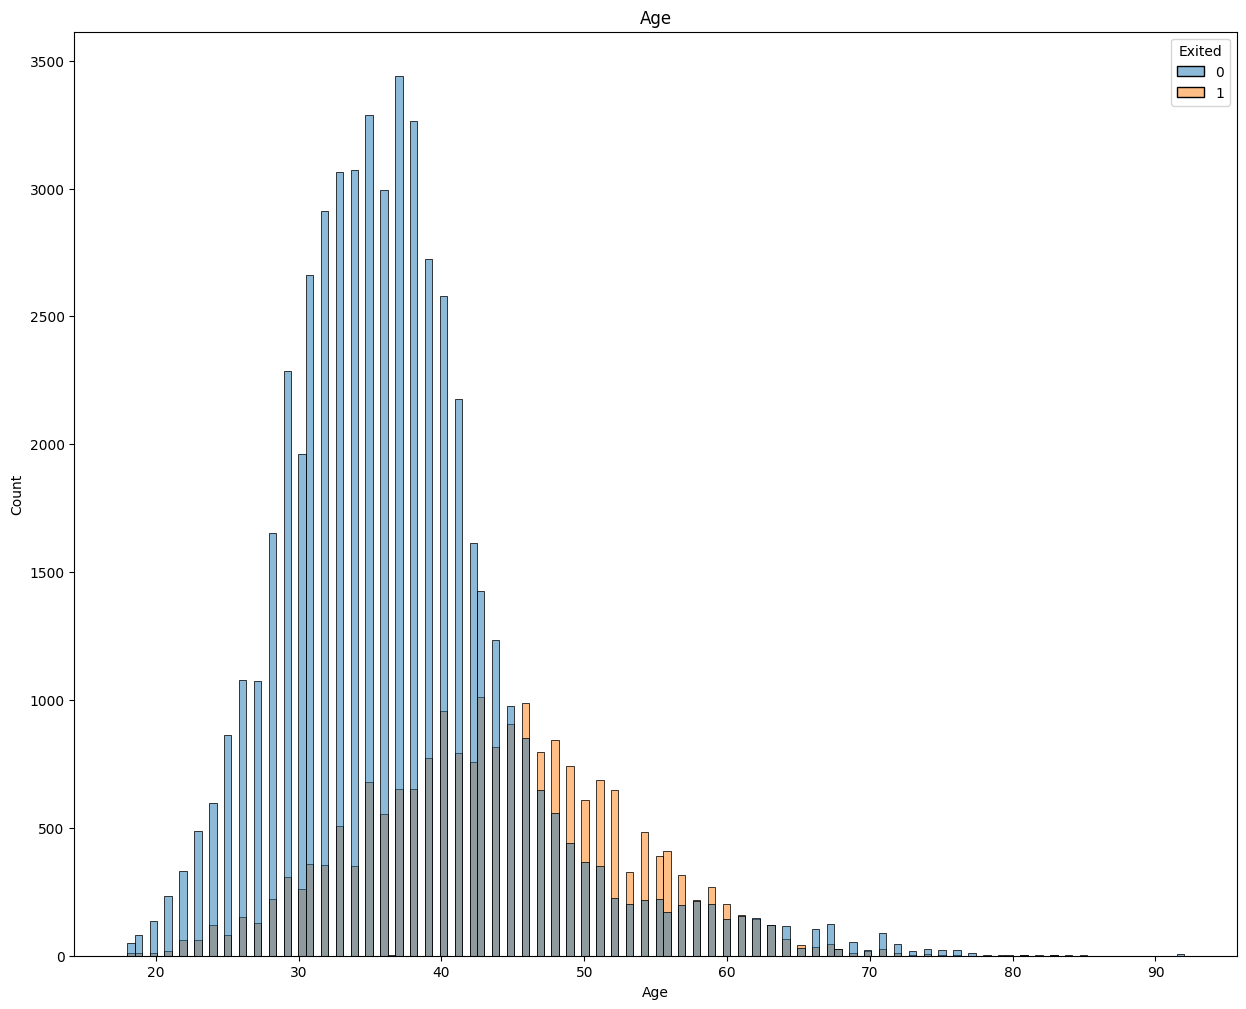

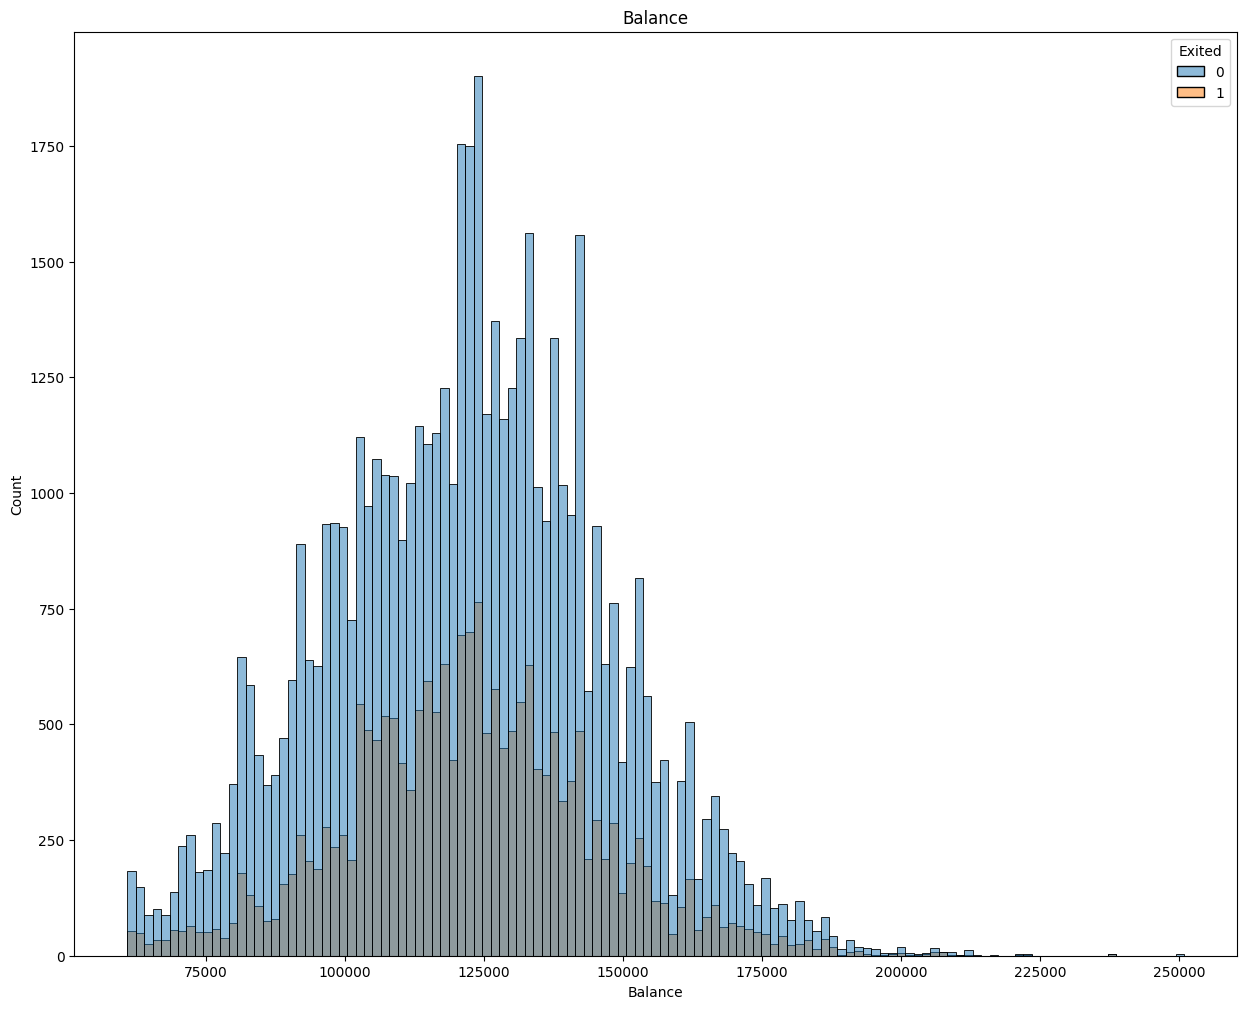

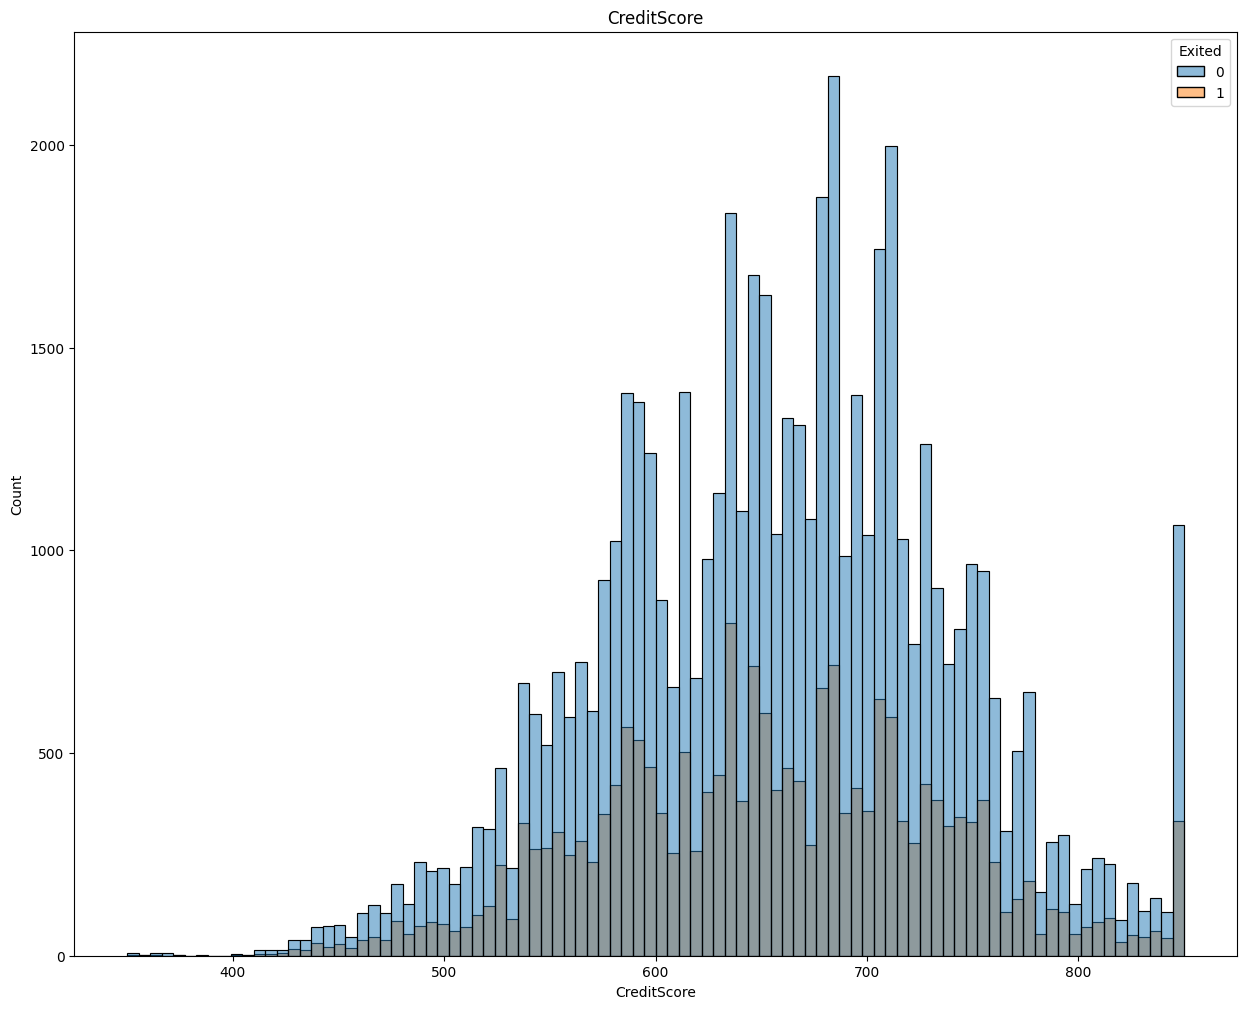

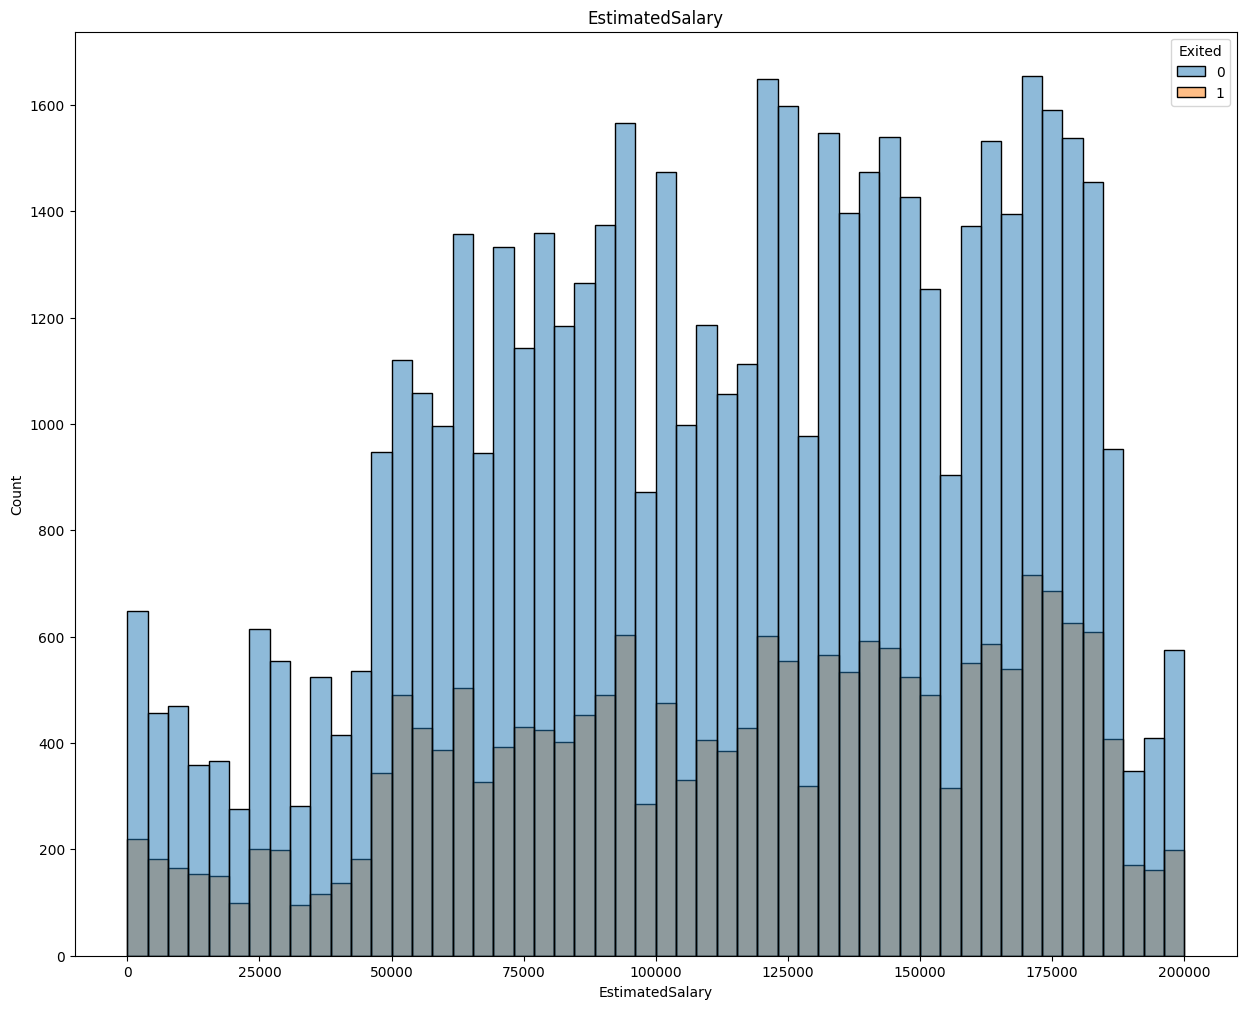

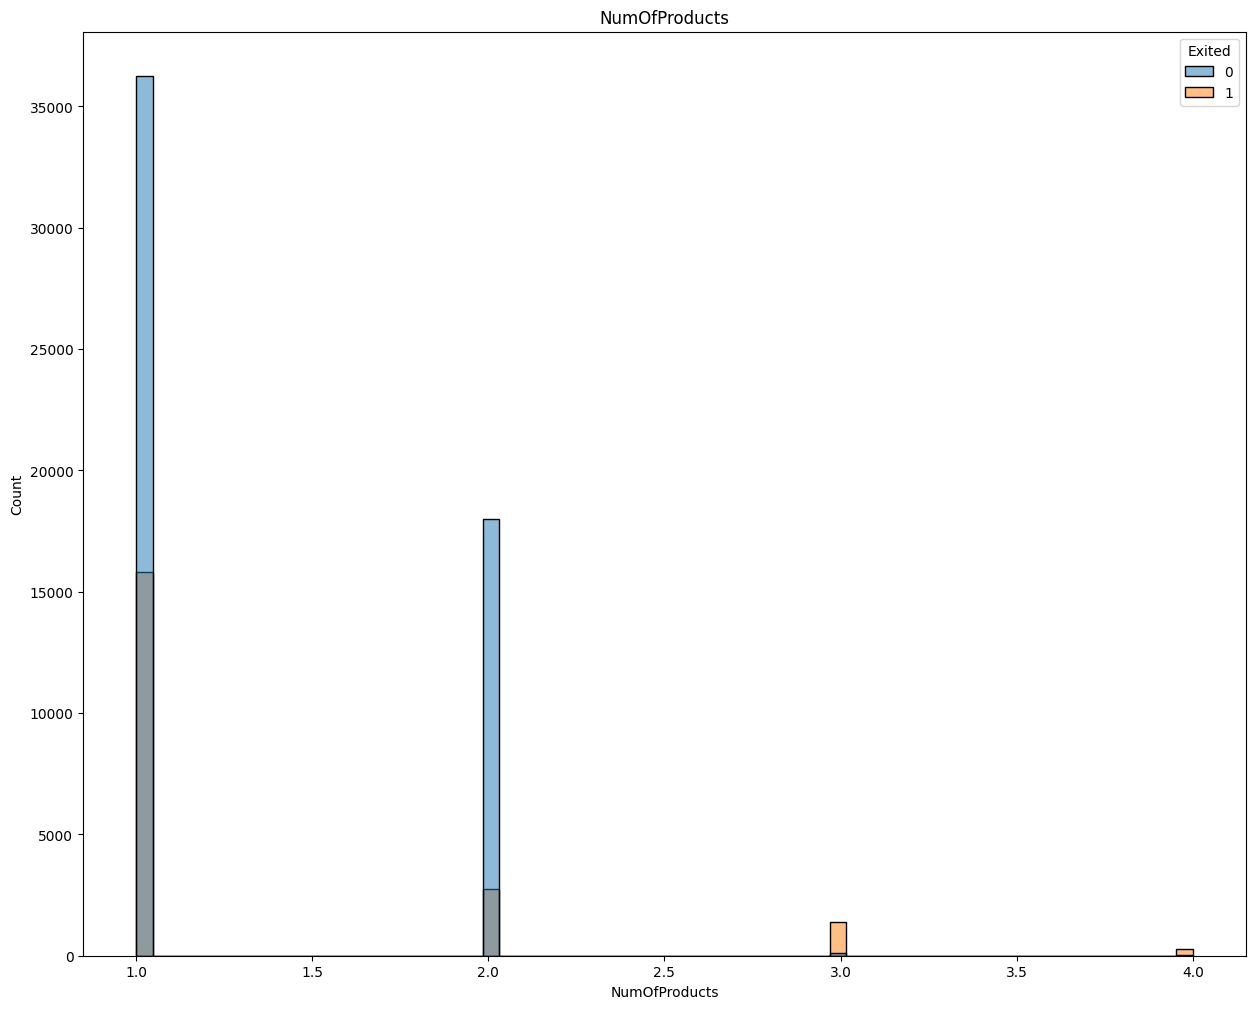

In [ ]:
kmeans_draw_plot(df, 'Age', 'Balance', 'CreditScore', 'EstimatedSalary', 2)

- 결과
  - id, 중복행 제거하지 않은 데이터
  - 두 집단 간의 이탈률에서 0.11 정도 차이가 발생
    - age : 30대까지는 데이터 수가 많은 것에 비해 이탈 고객이 적은 편, 40대 중반부터 60대까지는 데이터 수가 적은 것에 비해 이탈 고객이 많음
    - balance : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - creditscore : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - estimatedsalary : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - numofproducts : 데이터 수 대비 3, 4 이탈 고객이 많음

cluster
1    0.219512
0    0.202223
Name: Exited, dtype: float64


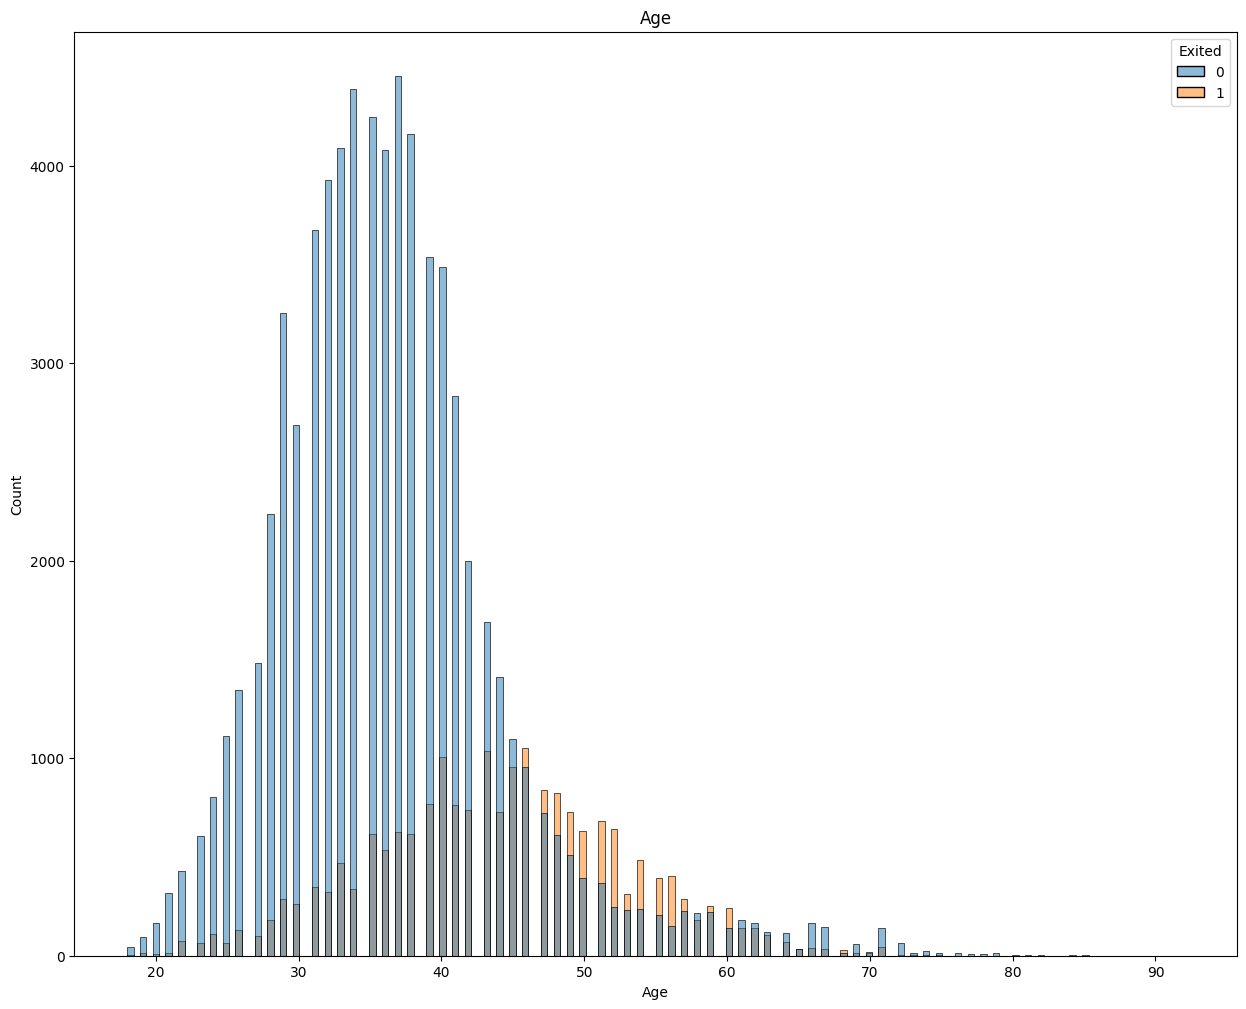

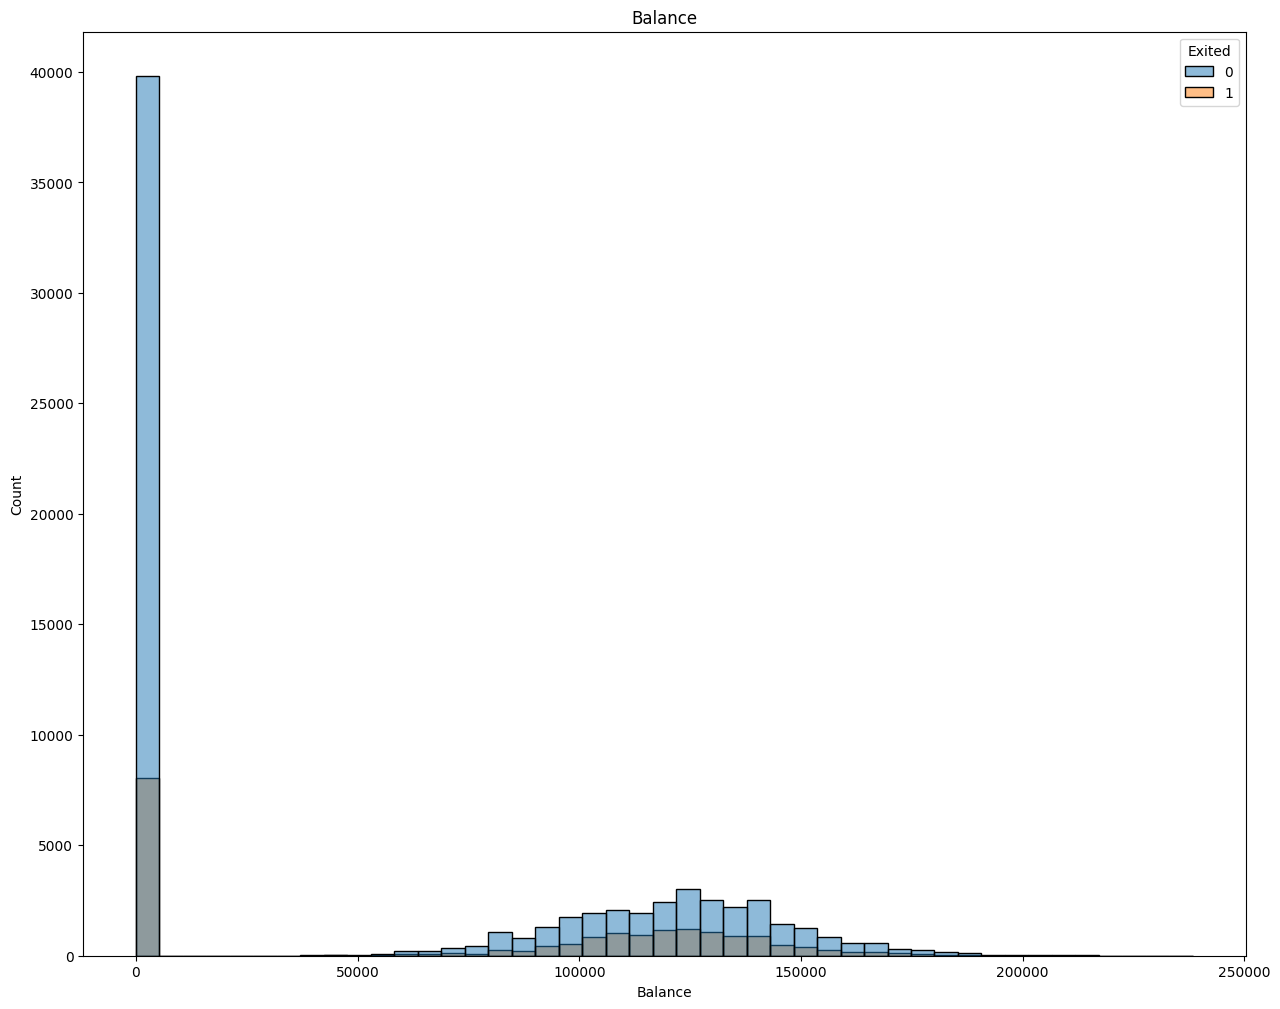

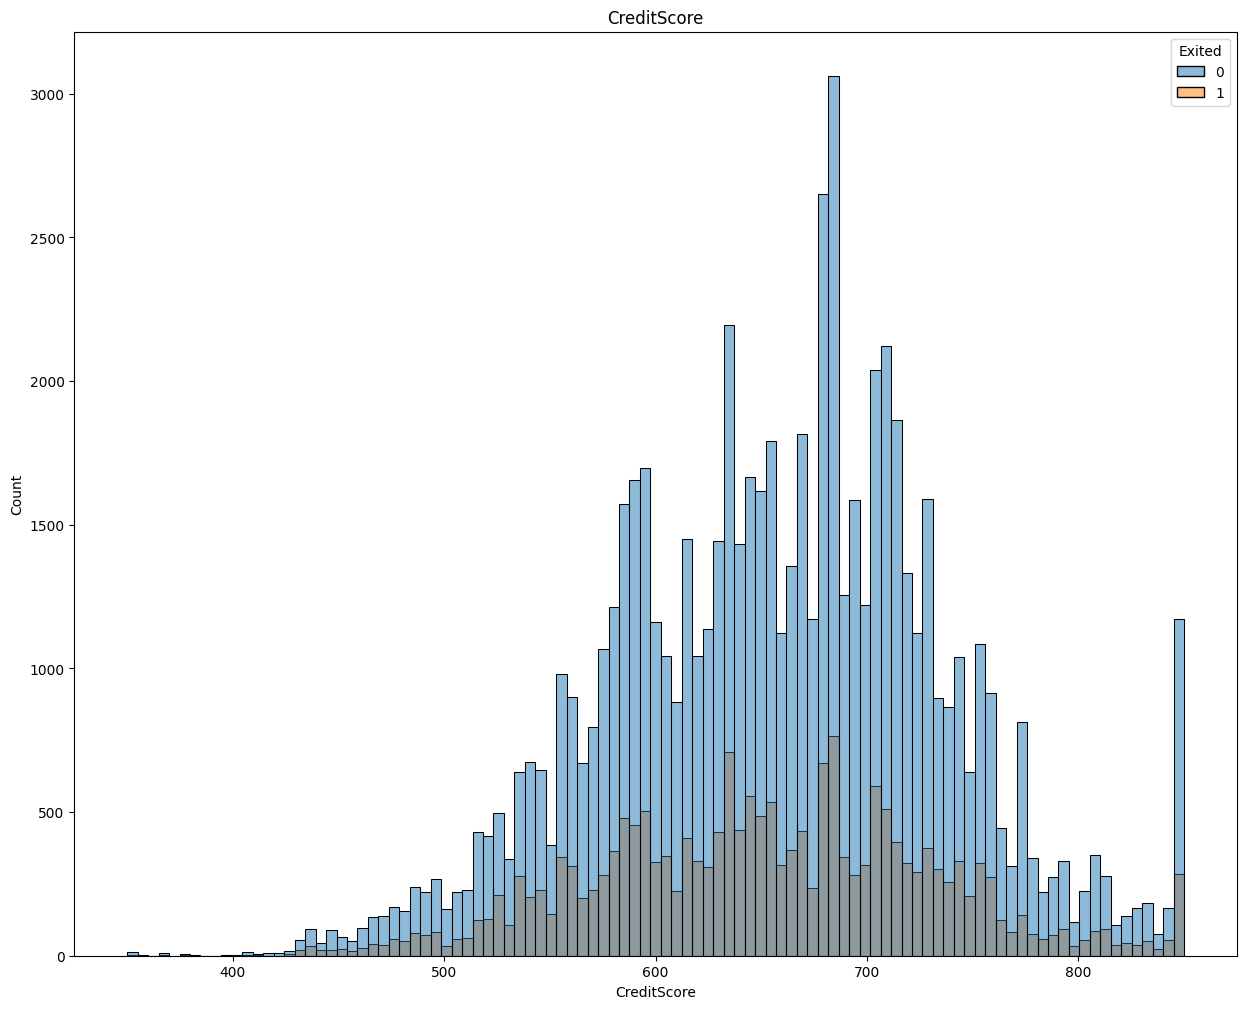

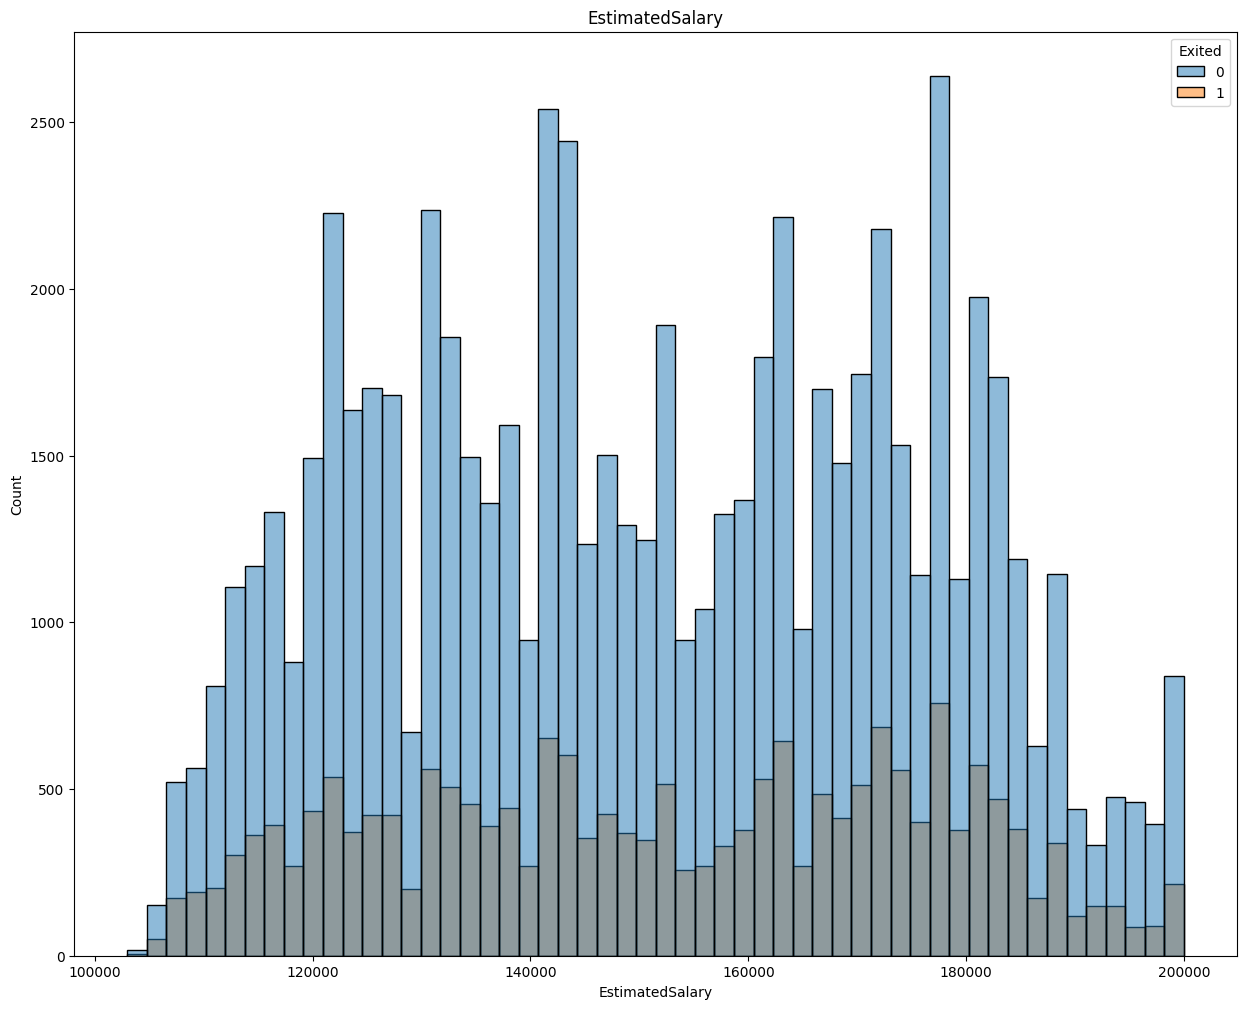

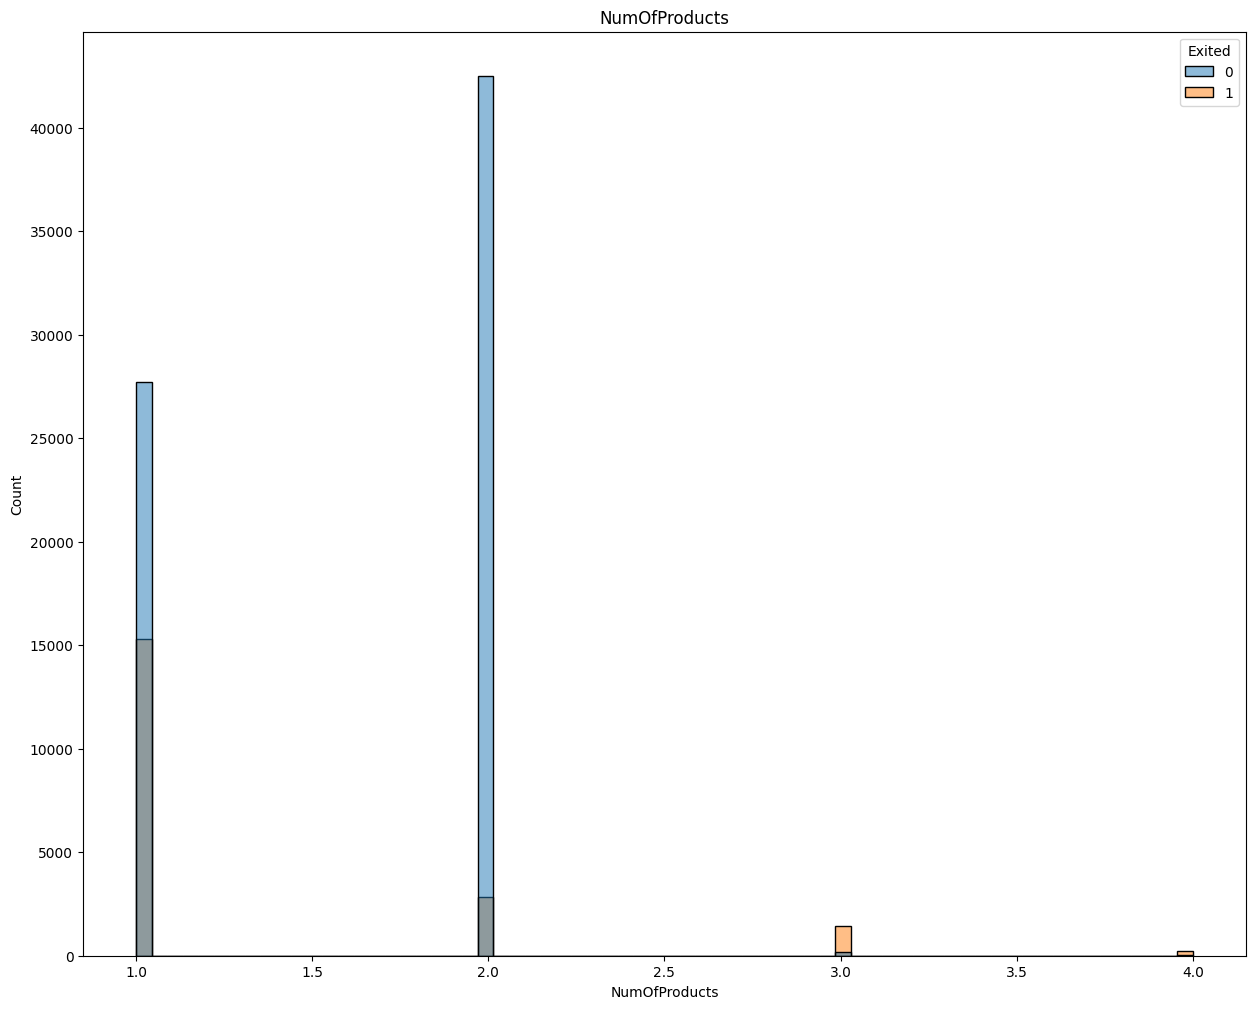

In [ ]:
kmeans_draw_plot(df_drop_id_duplicated, 'Age', 'Balance', 'CreditScore', 'EstimatedSalary', 2)

 - 결과
  - id, 중복행 제거 데이터
  - 두 집단 간의 이탈률에서 거의 차이가 없음
    - age : 30대까지는 데이터 수가 많은 것에 비해 이탈 고객이 적은 편, 40대 중반부터 60대까지는 데이터 수가 적은 것에 비해 이탈 고객이 많음
    - balance : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - creditscore : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - estimatedsalary : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - numofproducts : 데이터 수 대비 3, 4 이탈 고객이 많음
    - --> id, 중복행 제거하지 않은 데이터와 패턴 비슷

- k == 4

cluster
2    0.278404
0    0.261457
1    0.168438
3    0.155879
Name: Exited, dtype: float64


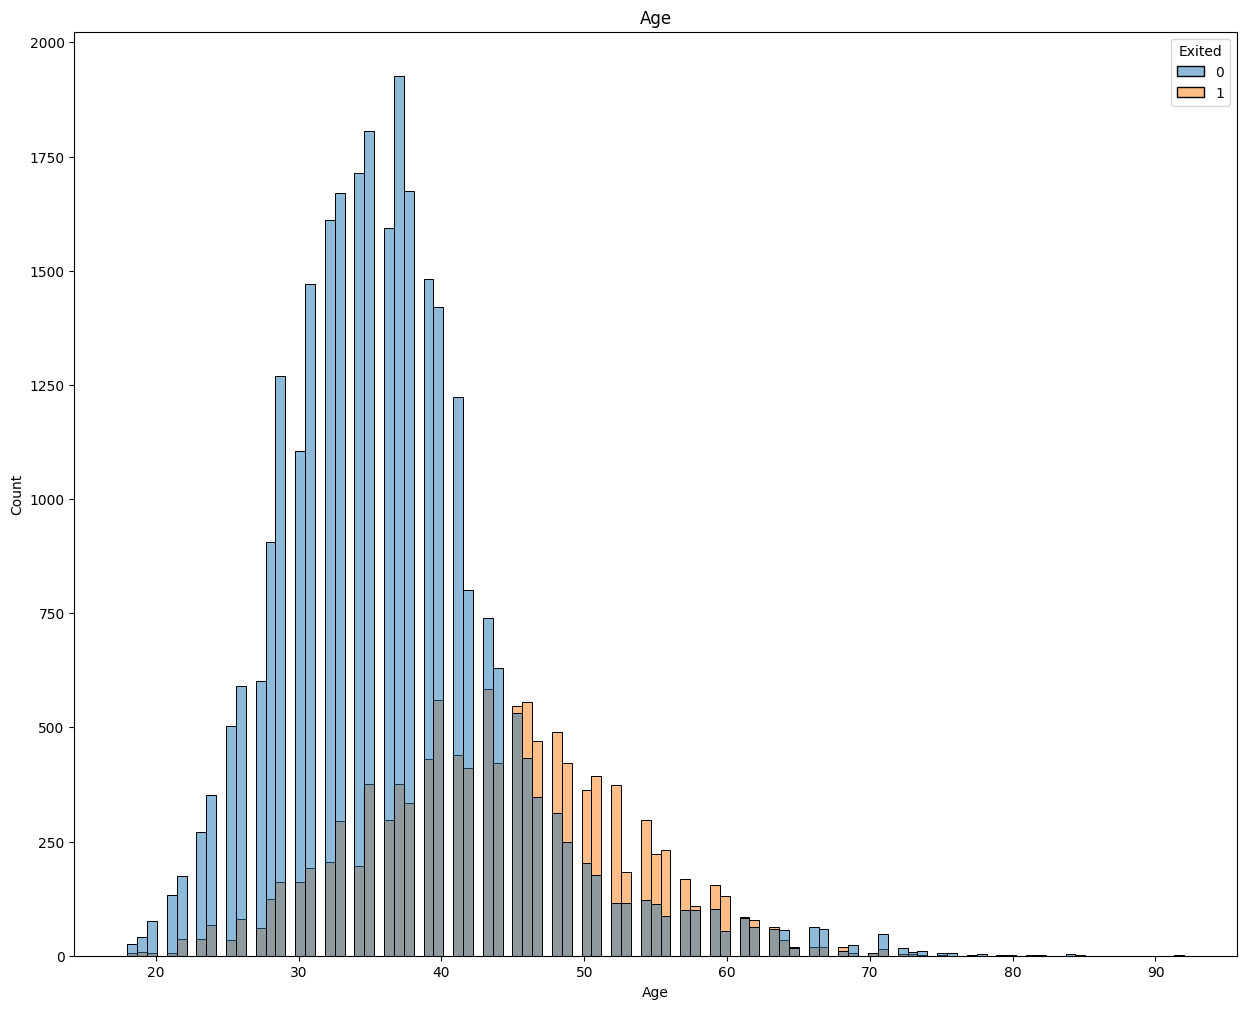

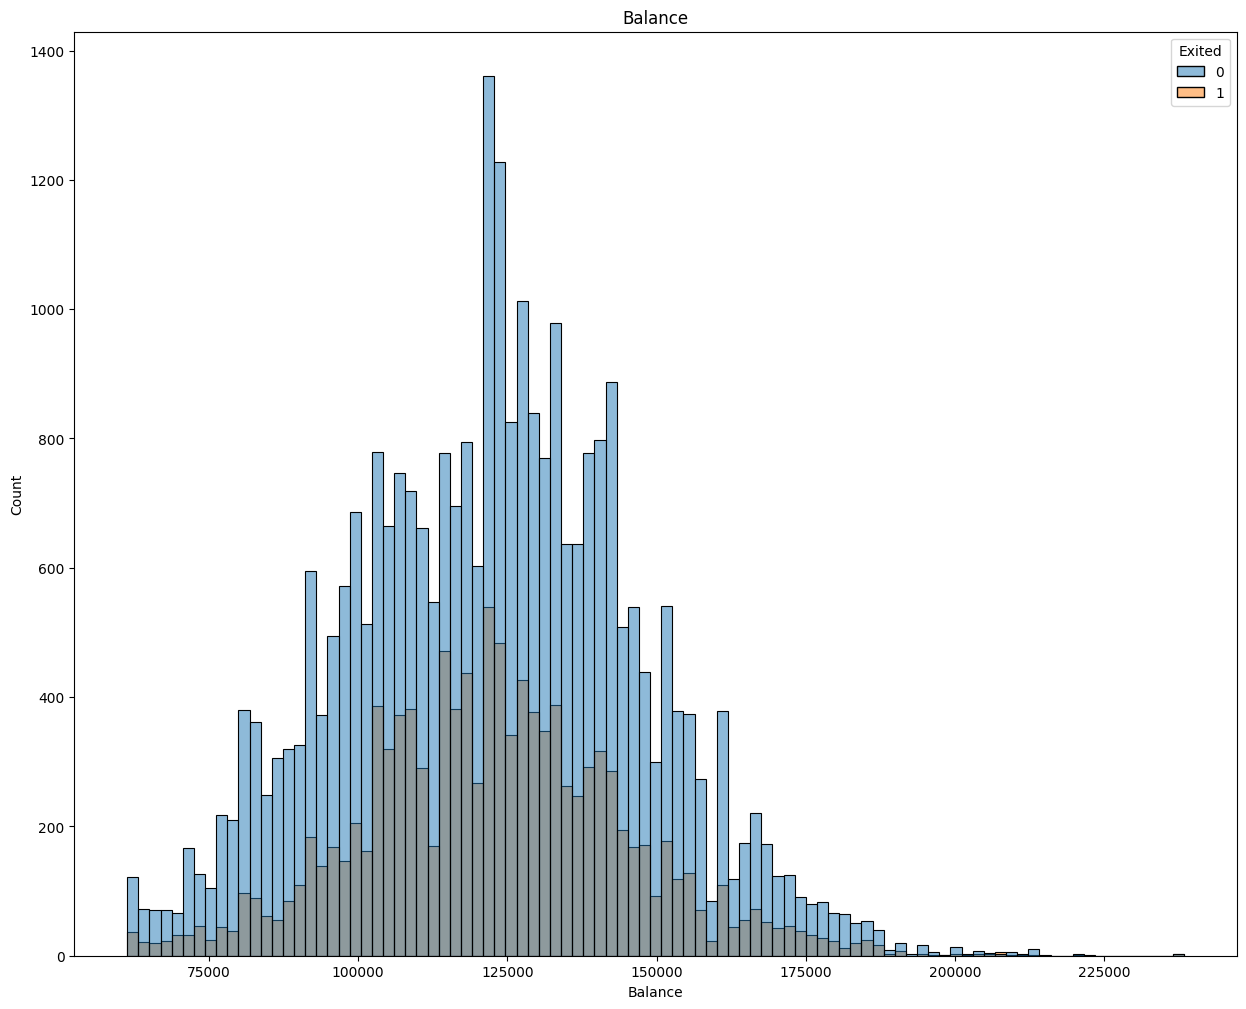

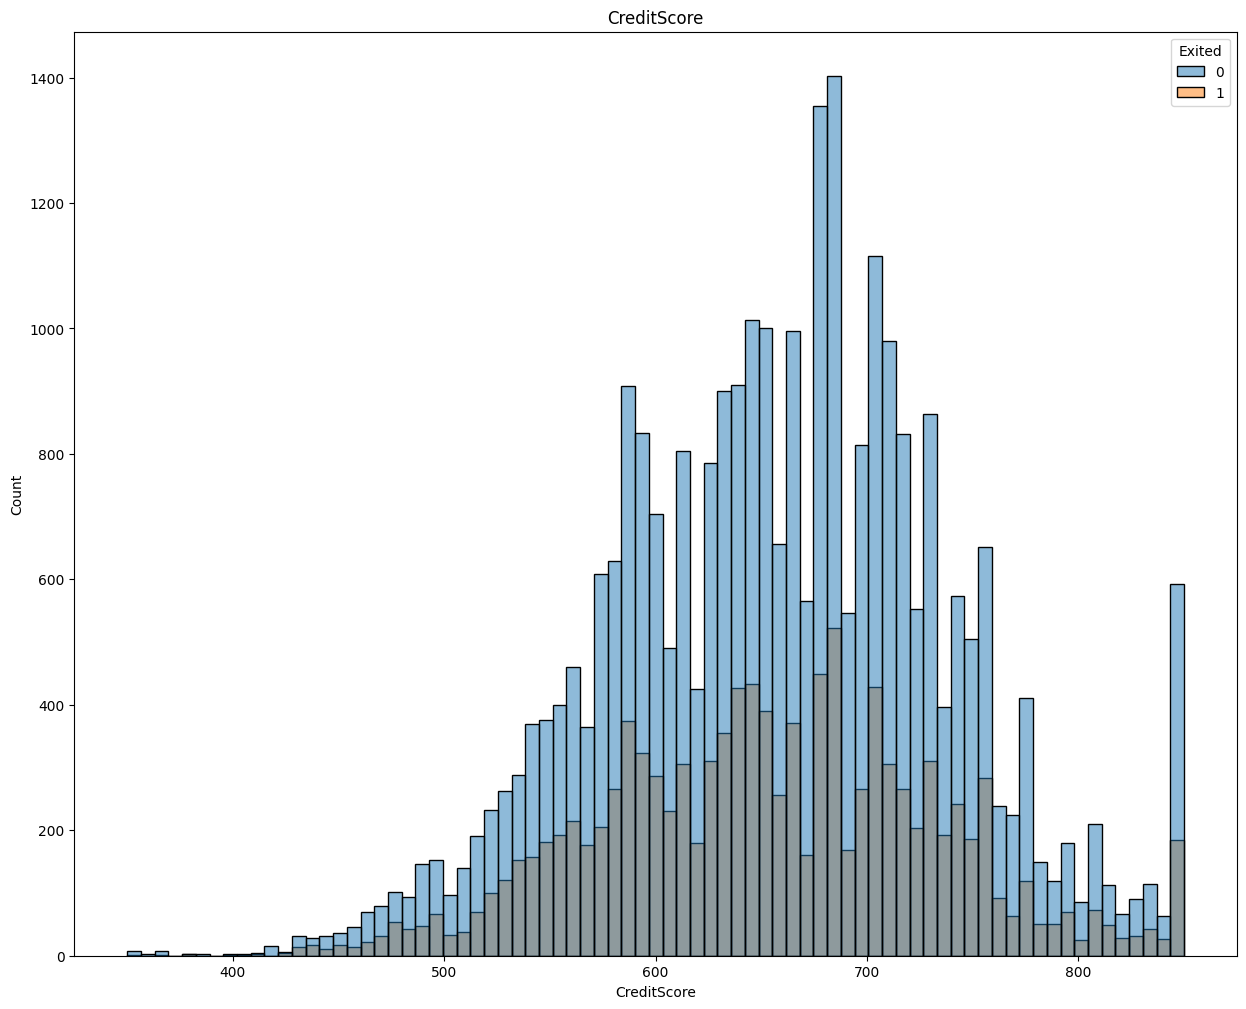

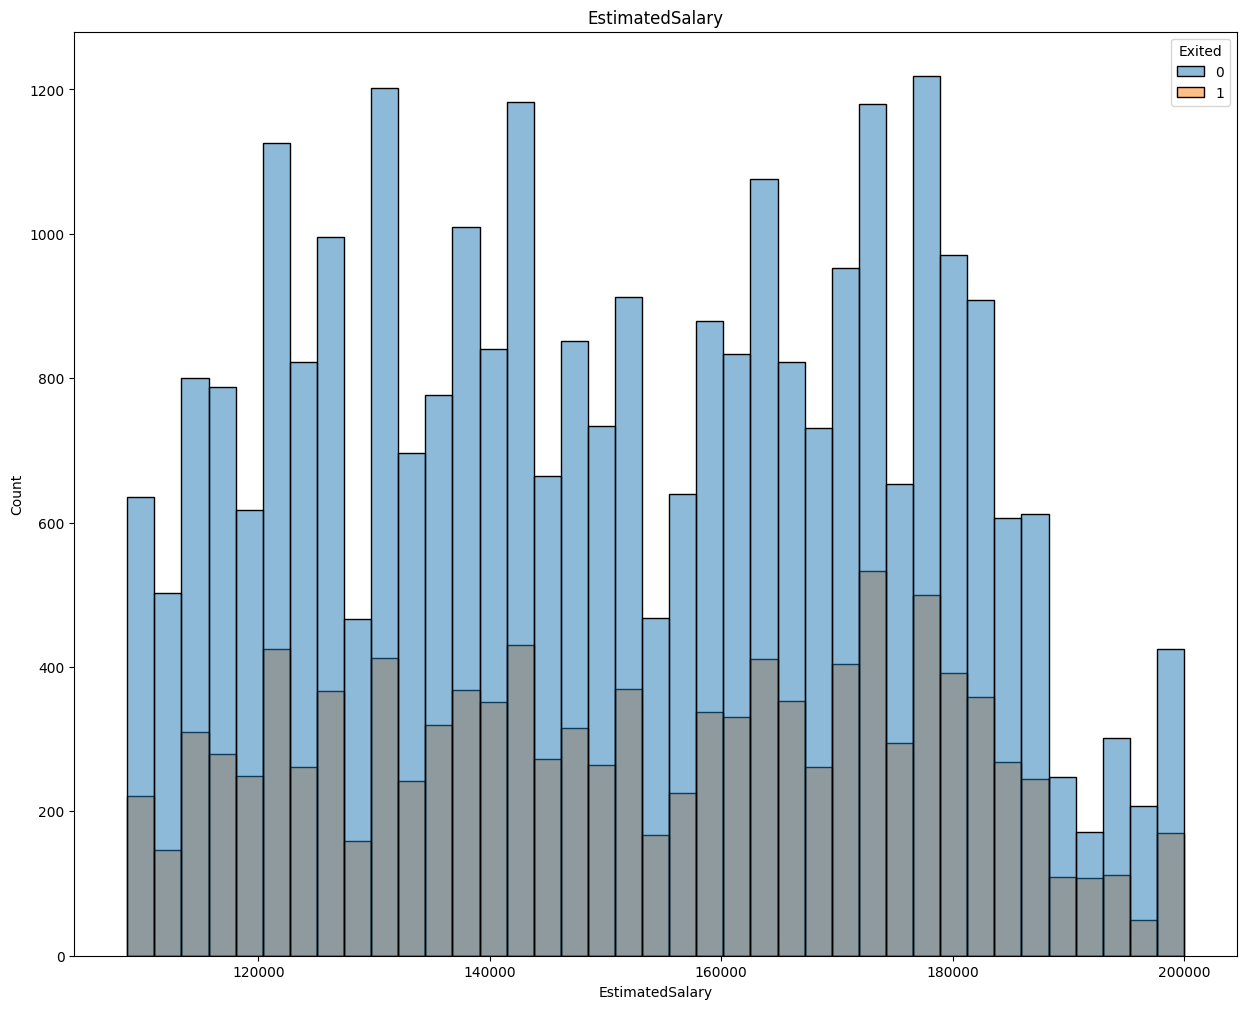

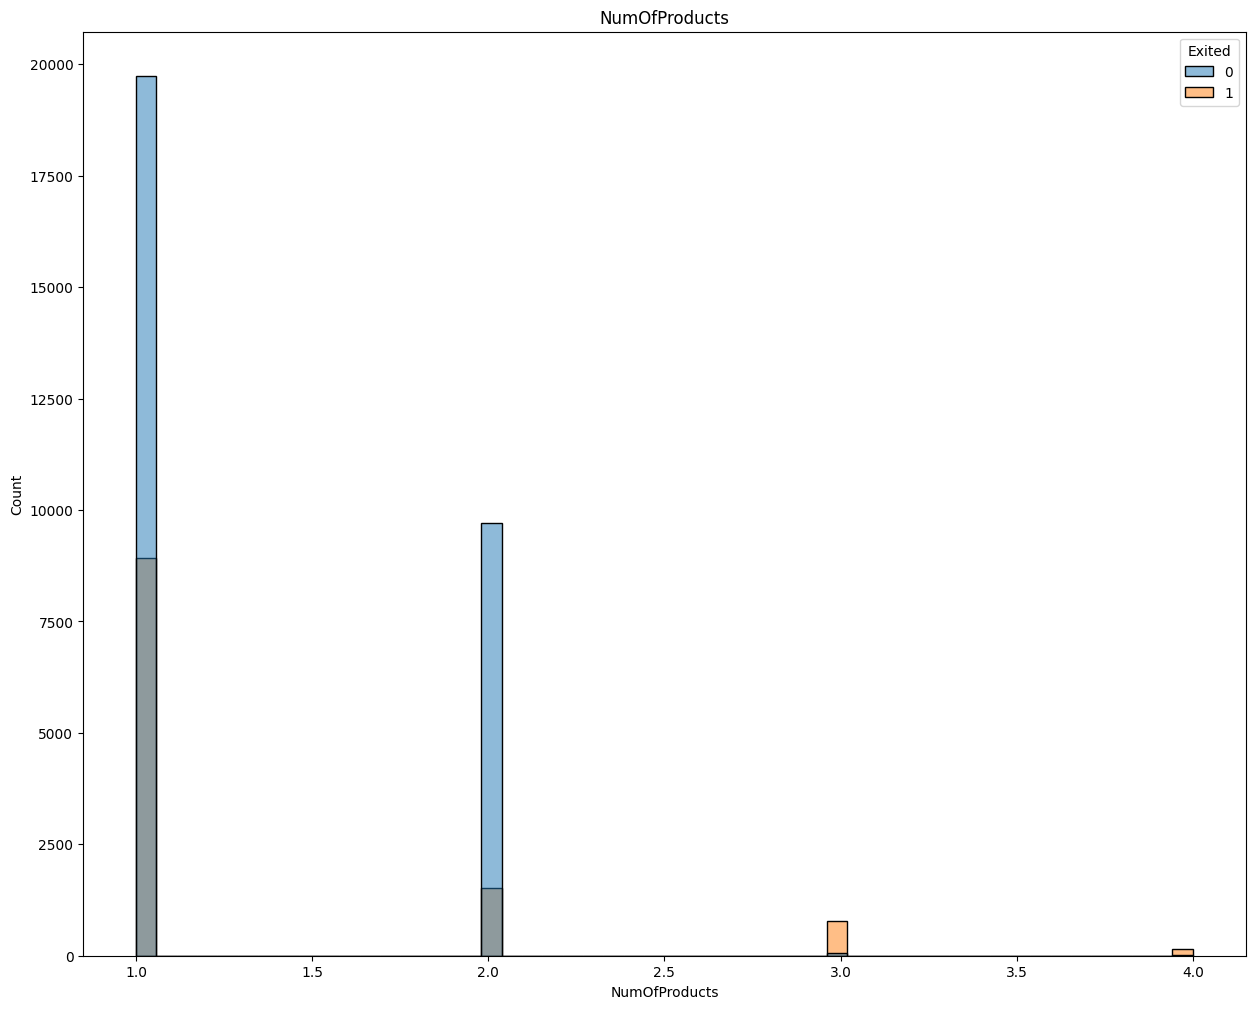

In [ ]:
kmeans_draw_plot(df, 'Age', 'Balance', 'CreditScore', 'EstimatedSalary', 4)

-  결과
  - id, 중복행 제거하지 않은 데이터
  - 4개의 집단 간의 이탈률에서 서로 차이가 많이 발생
    - age : 30대까지는 데이터 수가 많은 것에 비해 이탈 고객이 적은 편, 40대 중반부터 60대까지는 데이터 수가 적은 것에 비해 이탈 고객이 많음
    - balance : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - creditscore : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - estimatedsalary : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - numofproducts : 데이터 수 대비 3, 4 이탈 고객이 많음





cluster
3    0.278432
2    0.261589
1    0.168504
0    0.156045
Name: Exited, dtype: float64


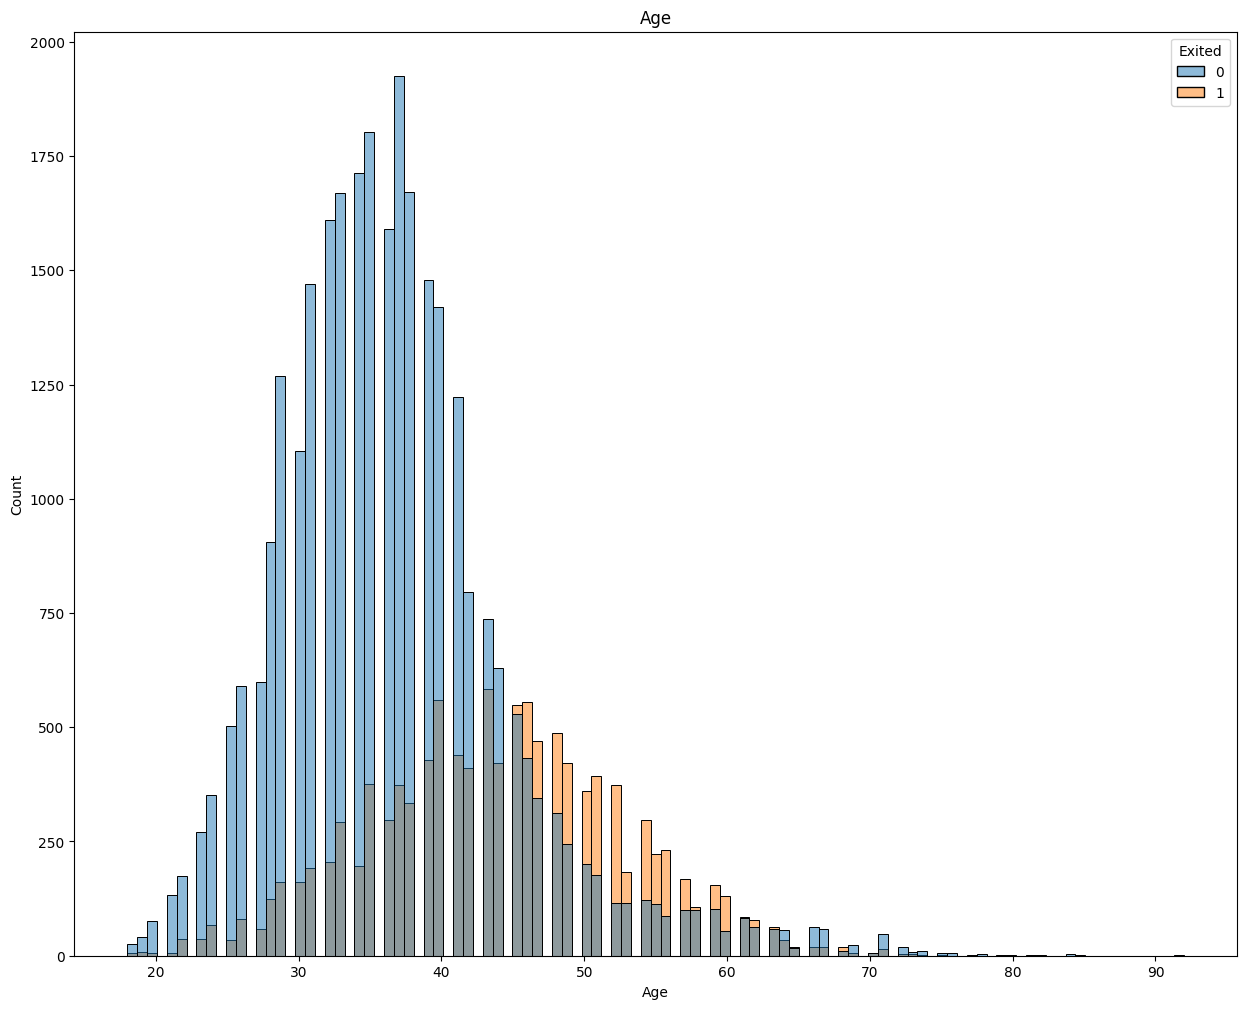

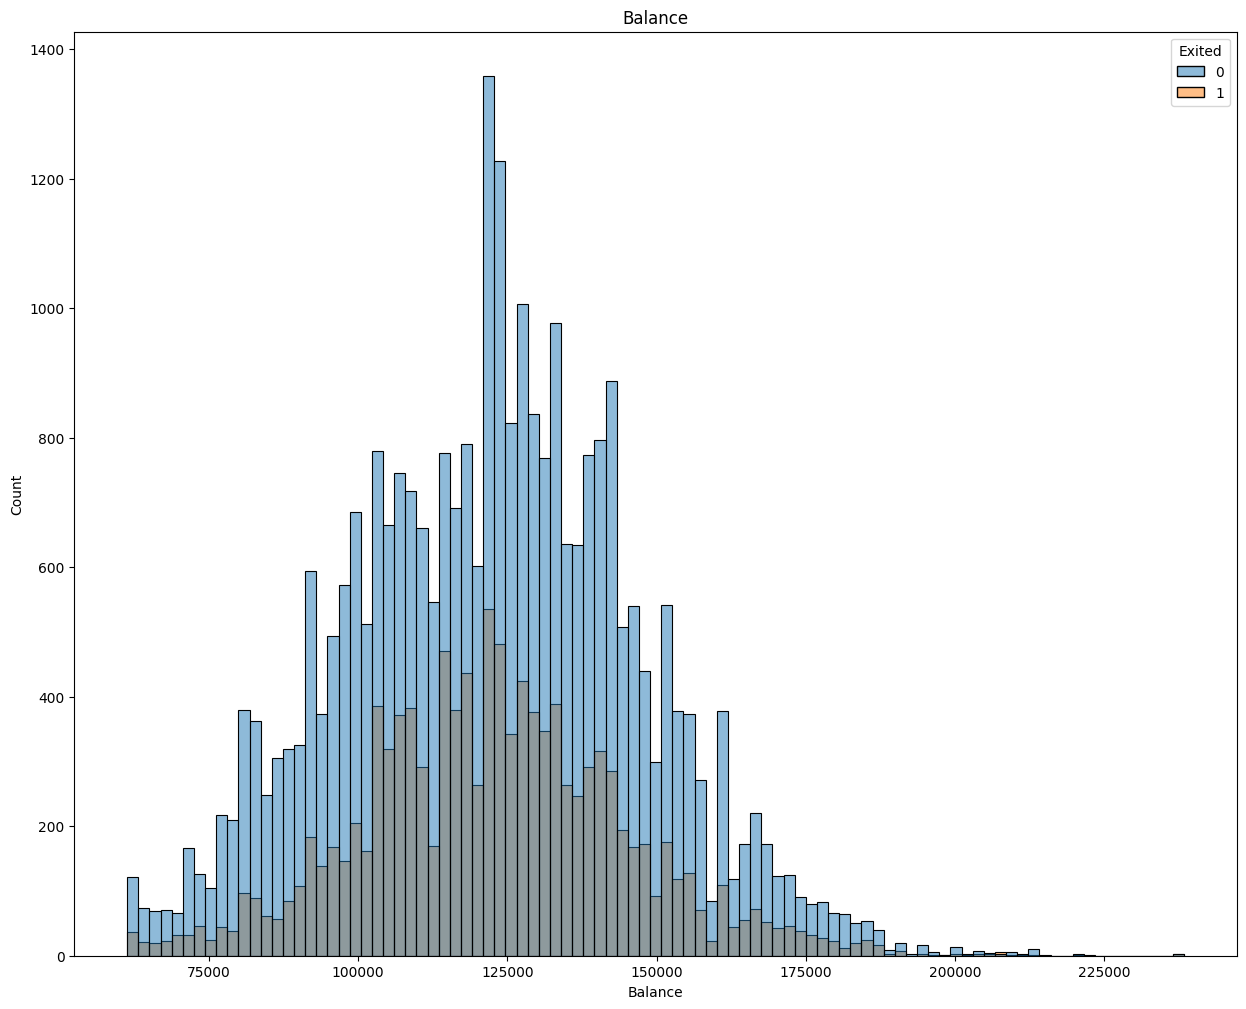

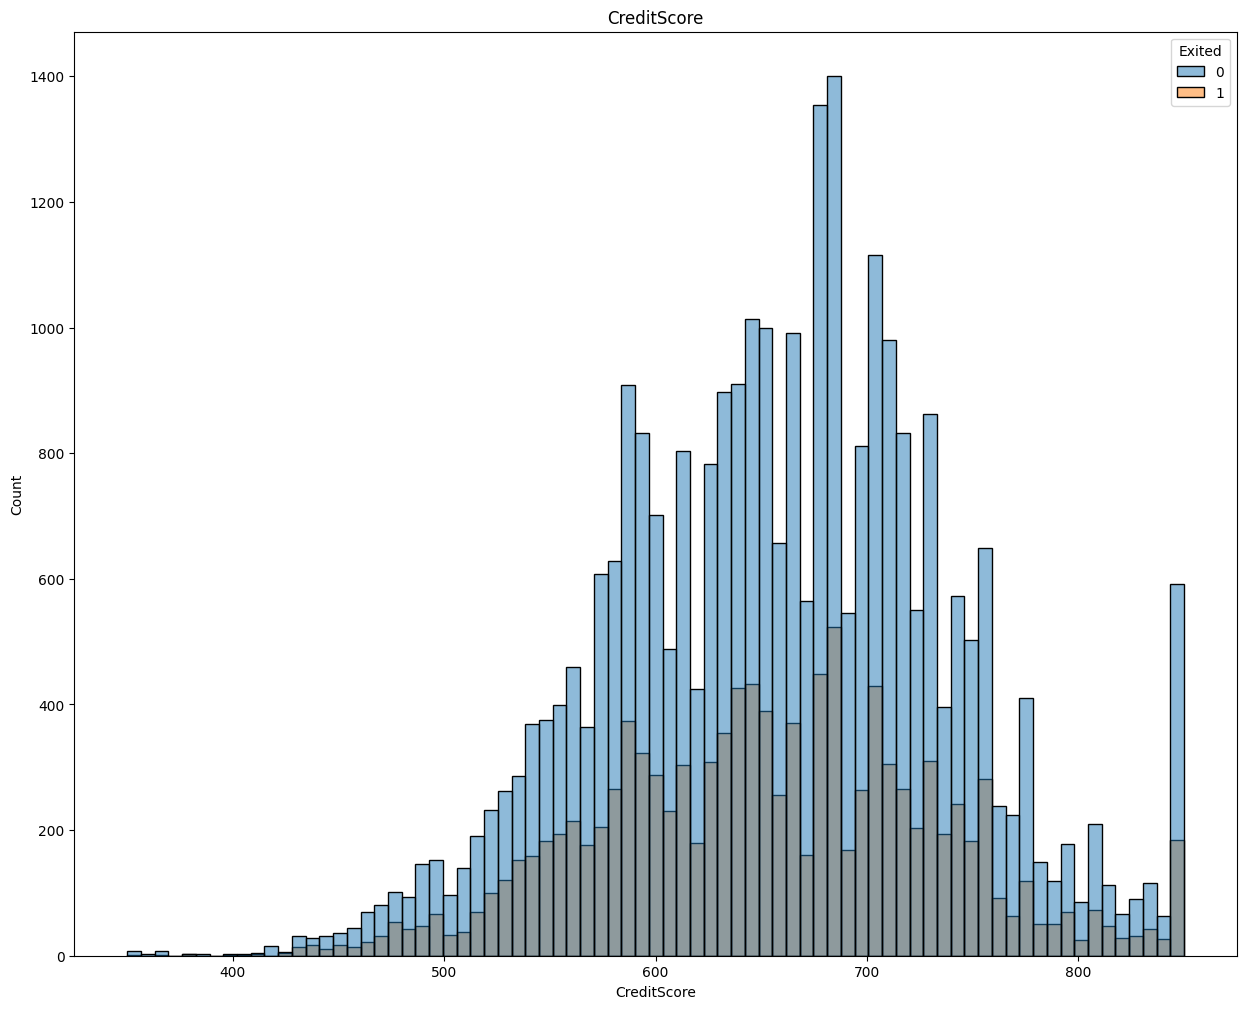

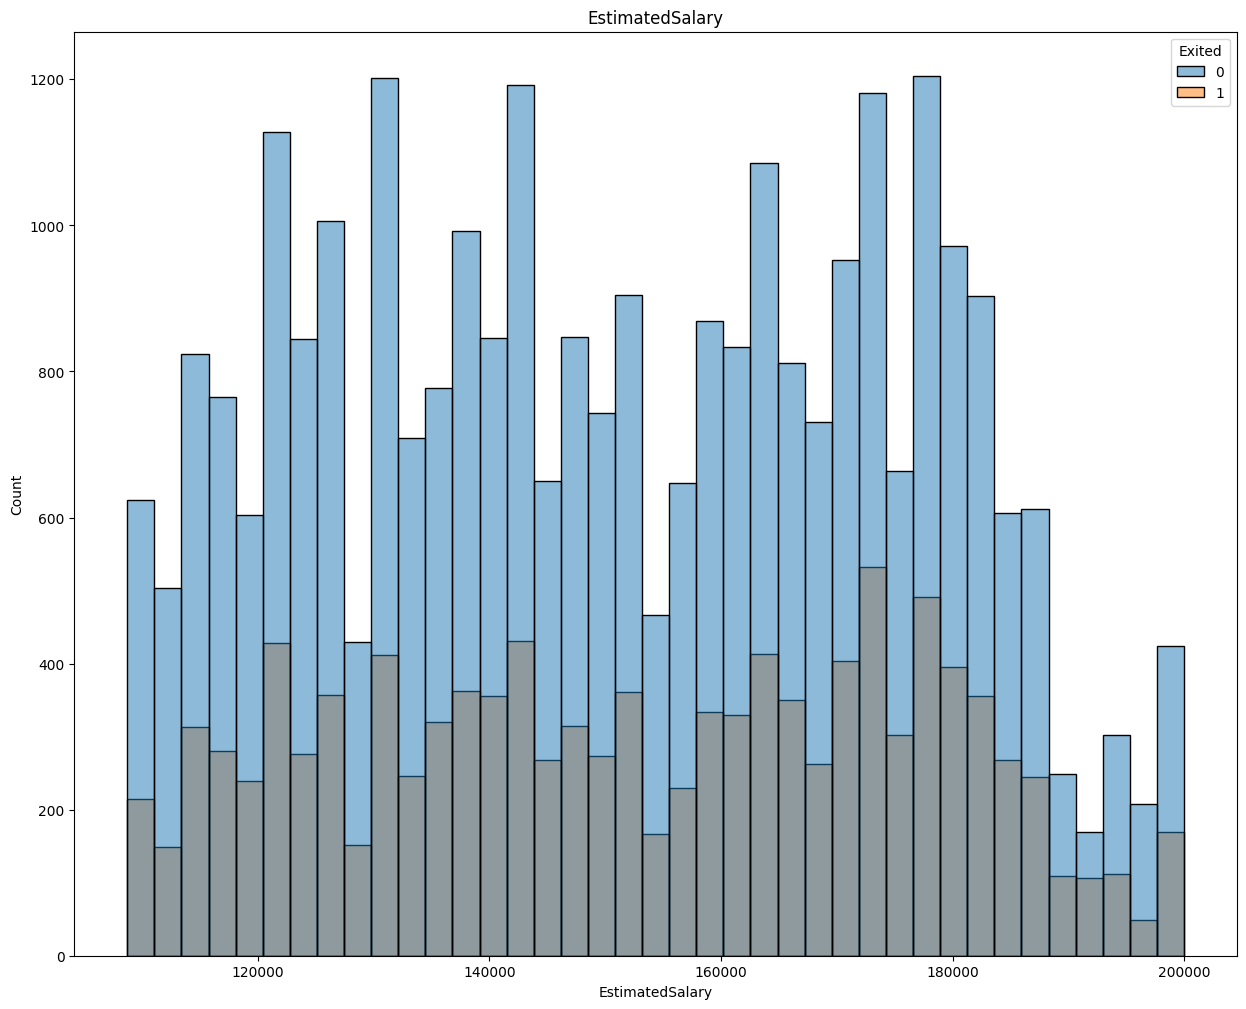

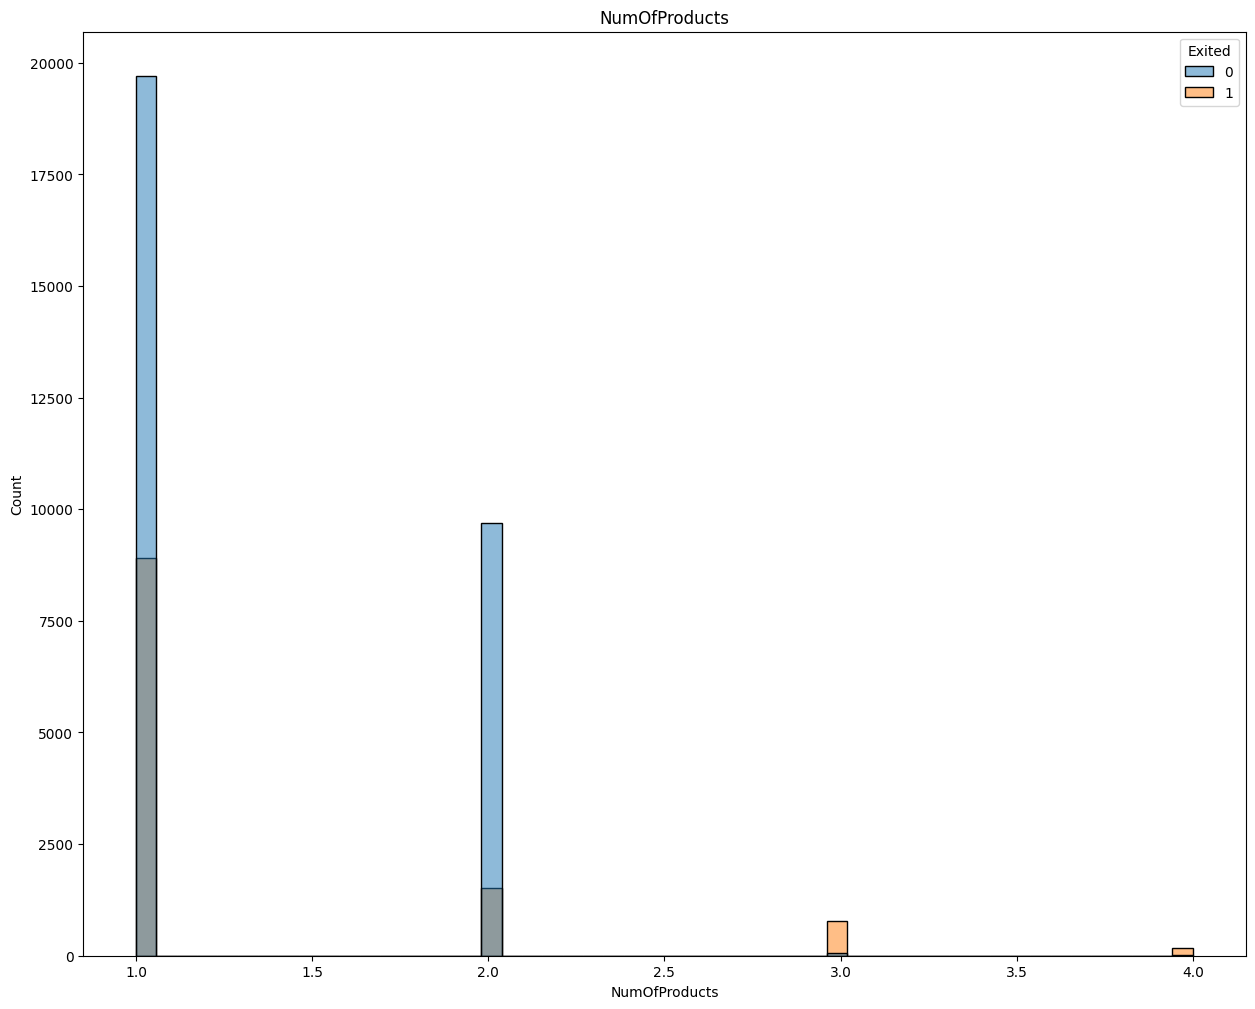

In [ ]:
kmeans_draw_plot(df_drop_id_duplicated, 'Age', 'Balance', 'CreditScore', 'EstimatedSalary', 4)

-  결과
  - id, 중복행 제거 데이터
  - 4개의 집단 간의 이탈률에서 서로 차이가 많이 발생
    - age : 30대까지는 데이터 수가 많은 것에 비해 이탈 고객이 적은 편, 40대 중반부터 60대까지는 데이터 수가 적은 것에 비해 이탈 고객이 많음
    - balance : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - creditscore : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - estimatedsalary : 이탈 고객과 이탈하지 않은 고객 분포가 비슷
    - numofproducts : 데이터 수 대비 3, 4 이탈 고객이 많음

- 정리
  - 다른 변수에 따른 클러스터링도 시도해볼 수는 있으나 카테고리형 변수이므로 각 군집의 중심점을 이용해 군집화 시키는 KMeans 클러스터링에는 딱히 의미가 없을 것으로 판단
  - id, 중복행 처리를 한 데이터와 id, 중복행 처리를 하지 않은 데이터 모두 군집화를 진행했을 때 이탈률이 가장 높은 군집에서 각 변수에 따른 이탈 분포가 전부 비슷한 패턴을 보였음
    - k = 2를 사용하고자 한다면 군집간 이탈률에서 0.11정도 차이가 있었던 df를 사용하는게,

      k = 4를 사용하고자 한다면 df나 df_drop_id_duplicated 상관없어보임
    - age : 30대까지는 데이터 수가 많은 것에 비해 이탈 고객이 적은 편, 40대 중반부터 60대까지는 데이터 수가 적은 것에 비해 이탈 고객이 많음
    - numofproducts : 데이터 수 대비 3, 4 이탈 고객이 많음
      - --> 나이대, 상품 수에 따른 마케팅 전략 필요